Case Study: How Does a Bike-Share Navigate Speedy Success?
============================================================

## Introduction 
This is a case study about the **Cyclistic bike-share analysis**, in this case, I will be analyzed by following the steps of **the data analysis process: ask, prepare, process, analyze, share, and act**.

### About the Company
In 2016, **Cyclistic** launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and returned to any other station in the system at any time.

### Business task:
Analyze the Cyclistic data set for one year to understand how annual members and casual riders use Cyclistic bikes differently.

### Stakeholders:

**Lily Moreno**: The director of marketing. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program.
**Cyclistic marketing analytics team: ** A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy.
**Cyclistic executive team**: The executive team will decide whether to approve the recommended marketing program.

### Deliverables:

> - A description of all data sources used
> - Documentation of any cleaning or manipulation of data
> - A summary of the analysis
> - Supporting visualizations and key findings
> - Top three to four recommendations based on the analysis

## STEP ONE: **ASK**
**Lily Moreno**(The director of marketing and my manager) has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. To do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trends by asking three questions that will guide the future marketing program:

**1.** How do annual members and casual riders use Cyclistic bikes differently?

**2.** Why would casual riders buy Cyclistic annual memberships?

**3.** How can Cyclistic use digital media to influence casual riders to become members?

**Moreno** has assigned you the first question to answer: **How do annual members and casual riders use Cyclistic bikes differently?**, to answer this question I should prepare data by collecting it from a trusted source.

## STEP TWO: PREPARE
the raw data is located in [here](https://divvy-tripdata.s3.amazonaws.com/index.html), and it is publicly available under this [license](https://ride.divvybikes.com/data-license-agreement) with some privacy restriction.


**ROCCC data**

> - **Reliable**: this dataset is complete, accurate and it is from a trusted source

> - **Original:** the data collected from the first part means it is Original 

> - **Comprehensive:** the data contain information that we need to do the analysis

> -  **Current:** I choose the period from September 2021 to August 2022 

> - **Cited:** the data is [here](https://divvy-tripdata.s3.amazonaws.com/index.html)

before downloading the raw data we need to install some dependencies

***install the libraries***


In [1]:
install.packages("tidyverse")
install.packages("janitor")
install.packages("skimr")
install.packages("ggplot2")
install.packages("lubridate")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘vctrs’, ‘broom’, ‘conflicted’, ‘dplyr’, ‘forcats’, ‘ggplot2’, ‘lubridate’, ‘readr’, ‘readxl’, ‘tidyr’


Warning message in install.packages("tidyverse"):
“installation of package ‘vctrs’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘dplyr’ had non-zero exit status”
Warning message in install.packages("tidyverse"):
“installation of package ‘tidyr’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



1. tidyverse: a core system of packages for data manipulation, visualization, and other things. To see more visit the following link  [https://www.tidyverse.org/](https://www.tidyverse.org/)

2. dplyr: is a library about data manipulation, providing a consistent set of verbs that help you solve the most common data manipulation challenges. For more info you can [https://dplyr.tidyverse.org/](https://dplyr.tidyverse.org/)

3. Janitor: is a simple library for cleaning dirty data, you can read more about it in this source, [janitor documentation](https://rdocumentation.org/packages/janitor/versions/2.1.0)

4. skimr: is a comprehensive statistic summary for a data frame, for more [skimr](https://cran.r-project.org/web/packages/skimr/vignettes/skimr.html)

5. ggplot2: is a data visualization library, that visually provides a more flexible show. more of it check this link [https://ggplot2.tidyverse.org/](https://ggplot2.tidyverse.org/)

6. lubridate: is a date-time library dealing with formats and separators to handle the changing time zone. See this link [https://lubridate.tidyverse.org/](https://lubridate.tidyverse.org/)

7. Tibble: is a modern data frame that is lazy and surly: they do less, check this useful documents [https://tibble.tidyverse.org/](https://tibble.tidyverse.org/)

8. markdown: is a library that provides your analyses into high-quality documents, again and last see this source  [https://rmarkdown.rstudio.com/](https://rmarkdown.rstudio.com/)

***load the libraries***


In [2]:
library(tidyverse)
library(dplyr) 
library(janitor) 
library(skimr) 
library(ggplot2) 
library(lubridate) 
library(tibble)
library(rmarkdown)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.0.10     ✔ readr     2.1.4 
✔ forcats   1.0.0      ✔ stringr   1.5.0 
✔ ggplot2   3.4.1      ✔ tibble    3.1.8 
✔ lubridate 1.9.2      ✔ tidyr     1.2.1 
✔ purrr     1.0.1      
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test




***then, I download the dataset that are from February 2022 to January 2023***

In [3]:
df_01 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202202-divvy-tripdata.csv")
df_02 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202203-divvy-tripdata.csv")
df_03 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202204-divvy-tripdata.csv")
df_04 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202206-divvy-tripdata.csv")
df_05 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202206-divvy-tripdata.csv")
df_06 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202207-divvy-tripdata.csv")
df_07 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202208-divvy-tripdata.csv")
df_08 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202209-divvy-publictripdata.csv")
df_09 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202210-divvy-tripdata.csv")
df_10 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202211-divvy-tripdata.csv")
df_11 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202212-divvy-tripdata.csv")
df_12 <- read_csv("/kaggle/input/divvy-tripdata-from-feb-2022-to-jan-2023/202301-divvy-tripdata.csv")


Rows: 115609 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 284042 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 371249 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

But before the check for missing values and duplication, I will check every dataset for consistency because I need to combine data into one.

1. see if we have the same columns **(colnames)** in all datasets

In [4]:
#df_01
colnames(df_01)
#df_02
colnames(df_02) 
#df_03
colnames(df_03)
#df_04
colnames(df_04)
#df_05
colnames(df_05)
#df_06
colnames(df_06)
#df_07
colnames(df_07)
#df08
colnames(df_08)
#df_09
colnames(df_09)
#df_10
colnames(df_10)
#df_11
colnames(df_11)
#df_12
colnames(df_12)

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

[1] "ride_id"            "rideable_type"      "started_at"        
 [4] "ended_at"           "start_station_name" "start_station_id"  
 [7] "end_station_name"   "end_station_id"     "start_lat"         
[10] "start_lng"          "end_lat"            "end_lng"           
[13] "member_casual"

2. A Structure of each dataset, we want to see each column and it's a datatype

In [5]:
str(df_01)
str(df_02)
str(df_03)
str(df_04)
str(df_05)
str(df_06)
str(df_07)
str(df_08)
str(df_09)
str(df_10)
str(df_11)
str(df_12)

spc_tbl_ [115,609 × 13] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:115609] "E1E065E7ED285C02" "1602DCDC5B30FFE3" "BE7DD2AF4B55C4AF" "A1789BDF844412BE" ...
 $ rideable_type     : chr [1:115609] "classic_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:115609], format: "2022-02-19 18:08:41" "2022-02-20 17:41:30" ...
 $ ended_at          : POSIXct[1:115609], format: "2022-02-19 18:23:56" "2022-02-20 17:45:56" ...
 $ start_station_name: chr [1:115609] "State St & Randolph St" "Halsted St & Wrightwood Ave" "State St & Randolph St" "Southport Ave & Waveland Ave" ...
 $ start_station_id  : chr [1:115609] "TA1305000029" "TA1309000061" "TA1305000029" "13235" ...
 $ end_station_name  : chr [1:115609] "Clark St & Lincoln Ave" "Southport Ave & Wrightwood Ave" "Canal St & Adams St" "Broadway & Sheridan Rd" ...
 $ end_station_id    : chr [1:115609] "13179" "TA1307000113" "13011" "13323" ...
 $ start_lat         : num [1:115609] 41.9 4


All dataset have the same columns ***(ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual)***,  I didn't to rename some dataset's becaue they have same columns name

#STEP THREE: PROCESSING 
before combining all datasets into one, first clean every dataset by the filter's out the duplicated value and looking for missing numeric values, then we can combine all datasets into one after that, I will add more columns that beneficial to my analysis.

1- Find the duplicated value

In [6]:
sum(duplicated(df_01$ride_id))
sum(duplicated(df_02$ride_id))
sum(duplicated(df_03$ride_id))
sum(duplicated(df_04$ride_id))
sum(duplicated(df_05$ride_id))
sum(duplicated(df_06$ride_id))
sum(duplicated(df_07$ride_id))
sum(duplicated(df_08$ride_id))
sum(duplicated(df_09$ride_id))
sum(duplicated(df_10$ride_id))
sum(duplicated(df_11$ride_id))
sum(duplicated(df_12$ride_id))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

as you can see there's no duplication in ride_id, so now let's keep forward and deal with the missing value

2- check if there is a missing value.

In [7]:
sum(is.na(df_01))
sum(is.na(df_02))
sum(is.na(df_03))
sum(is.na(df_04))
sum(is.na(df_05))
sum(is.na(df_06))
sum(is.na(df_07))
sum(is.na(df_08))
sum(is.na(df_09))
sum(is.na(df_10))
sum(is.na(df_11))
sum(is.na(df_12))

[1] 78024

[1] 197338

[1] 292984

[1] 388302

[1] 388302

[1] 467858

[1] 466804

[1] 431354

[1] 376894

[1] 212892

[1] 121138

[1] 109376

3- Combine all the df's into one


In [8]:
df <- bind_rows(df_01, df_02, df_03, df_04, df_05, df_06,
                df_07, df_08, df_09, df_10, df_11, df_12)

In [9]:
dim(df)

[1] 5888594      13

4- Because I have computational limitation I created a sample size that represents the population size.

> - Population size: 5,888,594
> - Confidence level: 99%
> - Margin of error: 0.5%
> - Sample size: 65,820

In [10]:
sample_df <- sample_n(df, 65820, replace= TRUE)

sample_df <- write_csv(sample_df, "sample_df.csv")

5- Add more columns by converting the started_at to date and splitting the day, month, year, and day of the week.

In [11]:
# Add  more columns that list the date, month, day, and year of each ride
sample_df$date <- as.Date(sample_df$started_at) #The default format is yyyy-mm-dd
sample_df$month <- format(as.Date(sample_df$date), "%m")
sample_df$day <- format(as.Date(sample_df$date), "%d")
sample_df$year <- format(as.Date(sample_df$date), "%Y")
sample_df$day_of_week <- format(as.Date(sample_df$date), "%A")
head(sample_df)
str(sample_df)

ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<chr>,<chr>
1F0E84CED7ED048A,electric_bike,2022-10-05 09:32:10,2022-10-05 09:46:30,N Carpenter St & W Lake St,20251.0,Damen Ave & Pierce Ave,TA1305000041,41.89000,-87.65000,41.90940,-87.67769,casual,2022-10-05,10,05,2022,Wednesday
AE53813BB650B7CD,classic_bike,2022-10-01 23:22:03,2022-10-01 23:28:36,Western Ave & 21st St,13091,Kedzie Ave & 21st St,15686,41.85411,-87.68584,41.85353,-87.70507,casual,2022-10-01,10,01,2022,Saturday
597834DC97EE63D9,classic_bike,2022-06-18 13:21:25,2022-06-18 13:53:11,Halsted St & Roscoe St,TA1309000025,DuSable Lake Shore Dr & Monroe St,13300,41.94367,-87.64895,41.88096,-87.61674,casual,2022-06-18,06,18,2022,Saturday
FE9674CF91265087,classic_bike,2022-07-30 21:49:07,2022-07-30 22:08:21,State St & Harrison St,SL-007,LaSalle Dr & Huron St,KP1705001026,41.87405,-87.62772,41.89488,-87.63233,casual,2022-07-30,07,30,2022,Saturday
CB14C7620D563366,classic_bike,2022-09-05 08:53:41,2022-09-05 09:02:50,Clark St & Wellington Ave,TA1307000136,Clark St & Lincoln Ave,13179,41.93650,-87.64754,41.91569,-87.63460,member,2022-09-05,09,05,2022,Monday
3F563C4926EAC90E,electric_bike,2022-04-23 08:33:27,2022-04-23 08:36:52,NA,NA,NA,NA,41.79000,-87.60000,41.80000,-87.60000,member,2022-04-23,04,23,2022,Saturday


spc_tbl_ [65,820 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ride_id           : chr [1:65820] "1F0E84CED7ED048A" "AE53813BB650B7CD" "597834DC97EE63D9" "FE9674CF91265087" ...
 $ rideable_type     : chr [1:65820] "electric_bike" "classic_bike" "classic_bike" "classic_bike" ...
 $ started_at        : POSIXct[1:65820], format: "2022-10-05 09:32:10" "2022-10-01 23:22:03" ...
 $ ended_at          : POSIXct[1:65820], format: "2022-10-05 09:46:30" "2022-10-01 23:28:36" ...
 $ start_station_name: chr [1:65820] "N Carpenter St & W Lake St" "Western Ave & 21st St" "Halsted St & Roscoe St" "State St & Harrison St" ...
 $ start_station_id  : chr [1:65820] "20251.0" "13091" "TA1309000025" "SL-007" ...
 $ end_station_name  : chr [1:65820] "Damen Ave & Pierce Ave" "Kedzie Ave & 21st St" "DuSable Lake Shore Dr & Monroe St" "LaSalle Dr & Huron St" ...
 $ end_station_id    : chr [1:65820] "TA1305000041" "15686" "13300" "KP1705001026" ...
 $ start_lat         : num [1:65820] 41.9 41.9 41.9 41.9 41.9

6- Add another column to ride_length by calculating the difference between ended_at and started_at, convert the datatype of ride_length, and than check if ride_length is numeric.

In [12]:
sample_df <- sample_df %>% 
  mutate(ride_length = ended_at - started_at)

head(sample_df$ride_length)
str(sample_df$ride_length)

Time differences in secs
[1]  860  393 1906 1154  549  205

 'difftime' num [1:65820] 860 393 1906 1154 ...
 - attr(*, "units")= chr "secs"


- convert the ride_lenght to numeric 

In [13]:
sample_df$ride_length <- as.numeric(sample_df$ride_length)

7- Check for error's in ride_length (in seconds), the ride_length must be greater or equal to 0

In [14]:
#remove bad data
sample_df_v2 <- sample_df[!(sample_df$ride_length<0),]

#error's in ride_length 
sum(sample_df_v2$ride_length < 0)

[1] 0

8 -  let's see if more then casual and member in casual_member, and I doing some calculation.

In [15]:
table(sample_df$member_casual)

sample_df %>% 
    group_by(member_casual) %>% 
    summarise(total = length(ride_length),
              'percentage' = (length(ride_length) / nrow(sample_df_v2)) * 100)


casual member 
 27207  38613 

member_casual,total,percentage
<chr>,<int>,<dbl>
casual,27207,41.33546
member,38613,58.66454


9- Create a new version that is cleaning and processed

In [16]:
write_csv(sample_df, "sample_df_v2.csv")


After this long step of processing data, now I can do the analysis step

**STEP FOUR: ANALYSIS**

-Before jumping to the analysis, we must read the new version(sample_df) that we created in the chunk above, and then convert it to the tibble data frame because it is easier than the classic data frame, and take a  glimpse of seen a summary (skim_without_charts) and the structure (str) of the new version, the columns must be 19, and the rows must be 65,820

In [17]:
sample_df_v2 <- read_csv("sample_df_v2.csv")
# using tibble 
as_tibble(sample_df_v2)

#summary
skim_without_charts(sample_df_v2)
#str 
str(sample_df_v2)
#number of rows
nrow(sample_df_v2)
#number of columns 
ncol(sample_df_v2)

Rows: 65820 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): ride_id, rideable_type, start_station_name, start_station_id, end...
dbl   (6): start_lat, start_lng, end_lat, end_lng, year, ride_length
dttm  (2): started_at, ended_at
date  (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,month,day,year,day_of_week,ride_length
<chr>,<chr>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<date>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1F0E84CED7ED048A,electric_bike,2022-10-05 09:32:10,2022-10-05 09:46:30,N Carpenter St & W Lake St,20251.0,Damen Ave & Pierce Ave,TA1305000041,41.89000,-87.65000,41.90940,-87.67769,casual,2022-10-05,10,05,2022,Wednesday,860
AE53813BB650B7CD,classic_bike,2022-10-01 23:22:03,2022-10-01 23:28:36,Western Ave & 21st St,13091,Kedzie Ave & 21st St,15686,41.85411,-87.68584,41.85353,-87.70507,casual,2022-10-01,10,01,2022,Saturday,393
597834DC97EE63D9,classic_bike,2022-06-18 13:21:25,2022-06-18 13:53:11,Halsted St & Roscoe St,TA1309000025,DuSable Lake Shore Dr & Monroe St,13300,41.94367,-87.64895,41.88096,-87.61674,casual,2022-06-18,06,18,2022,Saturday,1906
FE9674CF91265087,classic_bike,2022-07-30 21:49:07,2022-07-30 22:08:21,State St & Harrison St,SL-007,LaSalle Dr & Huron St,KP1705001026,41.87405,-87.62772,41.89488,-87.63233,casual,2022-07-30,07,30,2022,Saturday,1154
CB14C7620D563366,classic_bike,2022-09-05 08:53:41,2022-09-05 09:02:50,Clark St & Wellington Ave,TA1307000136,Clark St & Lincoln Ave,13179,41.93650,-87.64754,41.91569,-87.63460,member,2022-09-05,09,05,2022,Monday,549
3F563C4926EAC90E,electric_bike,2022-04-23 08:33:27,2022-04-23 08:36:52,NA,NA,NA,NA,41.79000,-87.60000,41.80000,-87.60000,member,2022-04-23,04,23,2022,Saturday,205
A1CF30BC39DF166E,electric_bike,2022-06-17 06:26:12,2022-06-17 07:09:58,Sheffield Ave & Wrightwood Ave,TA1309000023,NA,NA,41.92864,-87.65378,41.96000,-87.63000,casual,2022-06-17,06,17,2022,Friday,2626
57DBE2529D0AC868,docked_bike,2022-11-03 16:07:29,2022-11-03 17:28:19,Clark St & Lake St,KA1503000012,Wabash Ave & Roosevelt Rd,TA1305000002,41.88602,-87.63088,41.86723,-87.62596,casual,2022-11-03,11,03,2022,Thursday,4850
DB7692E113A86B1E,classic_bike,2022-07-12 09:17:48,2022-07-12 09:20:28,California Ave & Altgeld St,15646,California Ave & Milwaukee Ave,13084,41.92669,-87.69767,41.92269,-87.69715,member,2022-07-12,07,12,2022,Tuesday,160


,skim_type,skim_variable,n_missing,complete_rate,character.min,character.max,character.empty,character.n_unique,character.whitespace,Date.min,⋯,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,POSIXct.min,POSIXct.max,POSIXct.median,POSIXct.n_unique
,<chr>,<chr>,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<date>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dttm>,<dttm>,<dttm>,<int>
1,character,ride_id,0,1.0000000,16,16,0,65379,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,character,rideable_type,0,1.0000000,11,13,0,3,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,character,start_station_name,9499,0.8556822,10,64,0,958,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4,character,start_station_id,9499,0.8556822,3,37,0,907,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
5,character,end_station_name,10196,0.8450927,10,64,0,949,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
6,character,end_station_id,10196,0.8450927,3,35,0,903,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
7,character,member_casual,0,1.0000000,6,6,0,2,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
8,character,month,0,1.0000000,2,2,0,11,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
9,character,day,0,1.0000000,2,2,0,31,0,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


── Data Summary ────────────────────────
                           Values      
Name                       sample_df_v2
Number of rows             65820       
Number of columns          19          
_______________________                
Column type frequency:                 
  character                10          
  Date                     1           
  numeric                  6           
  POSIXct                  2           
________________________               
Group variables            None        

── Variable type: character ────────────────────────────────────────────────────
   skim_variable      n_missing complete_rate min max empty n_unique whitespace
 1 ride_id                    0         1      16  16     0    65379          0
 2 rideable_type              0         1      11  13     0        3          0
 3 start_station_name      9499         0.856  10  64     0      958          0
 4 start_station_id        9499         0.856   3  37     0      907         

[1] 65820

[1] 19

so now I can do the analysis.
-As mentioned before the member (58%) have a greater portion than casual (42%), this result give us a sense of the comparison between the member and casual, cannot be equally and we can do more comparison by taking the average(mean,  median), min,and a max of ride_length  of each member and casual, than comparing it by each day

In [18]:
# Compare members and casual users
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = mean)
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = median)
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = max)
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = min)
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = sd)
aggregate(sample_df_v2$ride_length ~ sample_df_v2$member_casual, FUN = sum)

sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,1688.829
member,763.611


sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,771
member,534


sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,1163405
member,89996


sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,0
member,0


sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,15955.65
member,1767.28


sample_df_v2$member_casual,sample_df_v2$ride_length
<chr>,<dbl>
casual,45947964
member,29485313


-**FINDING (1)**

- >  In general, before diving in you can see in the tables above the casual have great (mean, max) values, and they also varied (standard deviation) than members even if the sum of the member greater than casual, maybe this is because there are a few users (42%) using the bike's for a long ride but they are not a member.

In [19]:
sample_df_v2 %>% 
  group_by(member_casual) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length), sum_ride_length = sum(ride_length)) %>% 
  arrange(member_casual)

member_casual,number_of_rides,average_duration,sum_ride_length
<chr>,<int>,<dbl>,<dbl>
casual,27207,1688.829,45947964
member,38613,763.611,29485313


-**FINDING (2)**

- > here in the table above we can take an intuition about why the mean of casual is greater than member but the number of rides is way less than that of the member, that's because the ride length sum of casual(44517203) is greater of the ride sum of member(29342886). conversely, the length of rides of casual is less than the ride length of the member, this explains why the mean of the casual ride is greater than that of member.

**Figure(1)**:
-the sum of each member and casual 

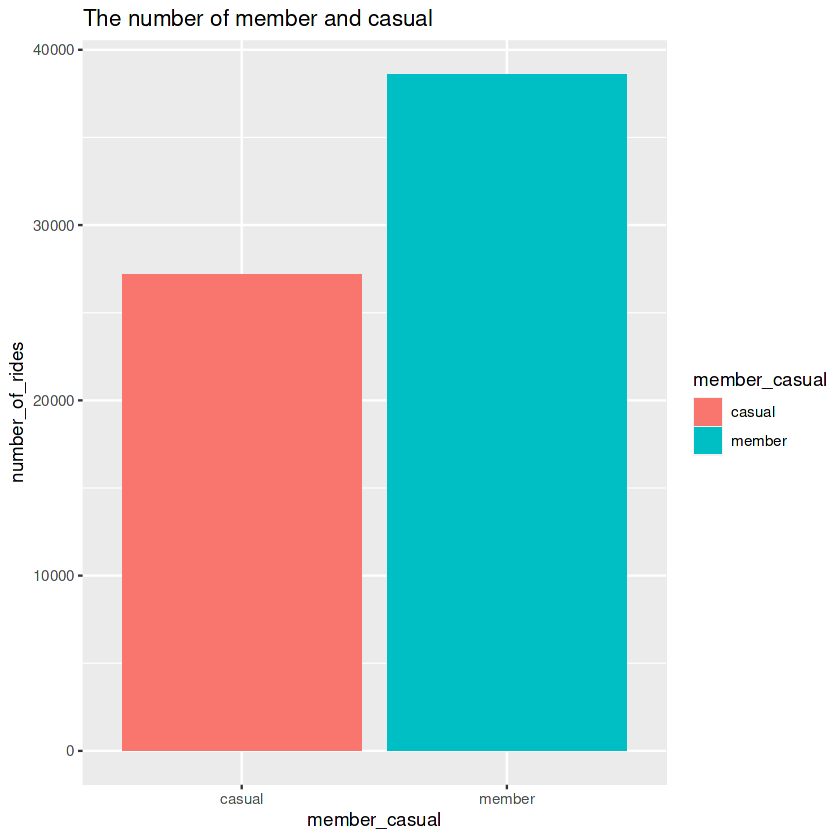

In [39]:
sample_df_v2 %>% 
  group_by(member_casual) %>% 
  summarise(number_of_rides = n()) %>% 
  arrange(member_casual) %>% 
  ggplot(aes(member_casual, number_of_rides, fill=member_casual)) +
    geom_col(position="dodge")+ labs(title = 'The number of member and casual', xlabel="member and casual", ylabel="Total of rides")

-**FINDING (3)**
- > As you can see in figure(1)  above, the number of members is more than the number of casual, this is because ~58% use bikes as member.

**Figure(2)**
- the mean of ride length of each member and casual 

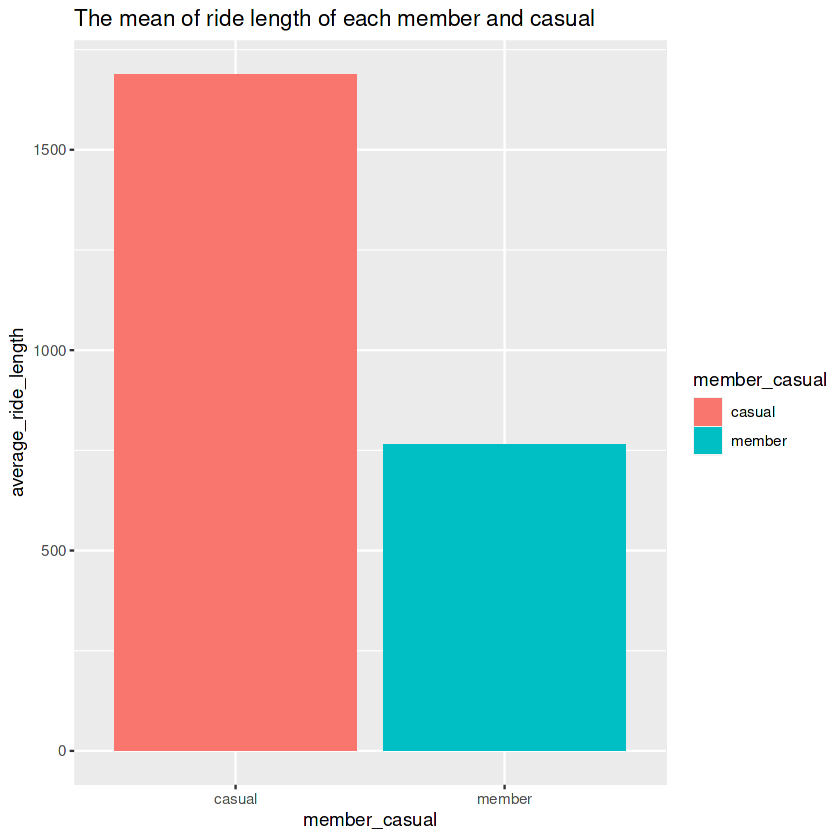

In [41]:
sample_df_v2 %>% 
  group_by(member_casual) %>% 
  summarise(average_ride_length= mean(ride_length)) %>% 
  arrange(member_casual) %>% 
  ggplot(aes(x = member_casual, y = average_ride_length, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title="The mean of ride length of each member and casual", xlabel="member_casual", ylabel="the average of each member and casual")

-**FINDING (4)**
- > In Figure(2), the mean ride length of the casual is up to 1500, while the member didn't reach 1000.

**Figure(3)**
-the sum of ride length of each member and casual.

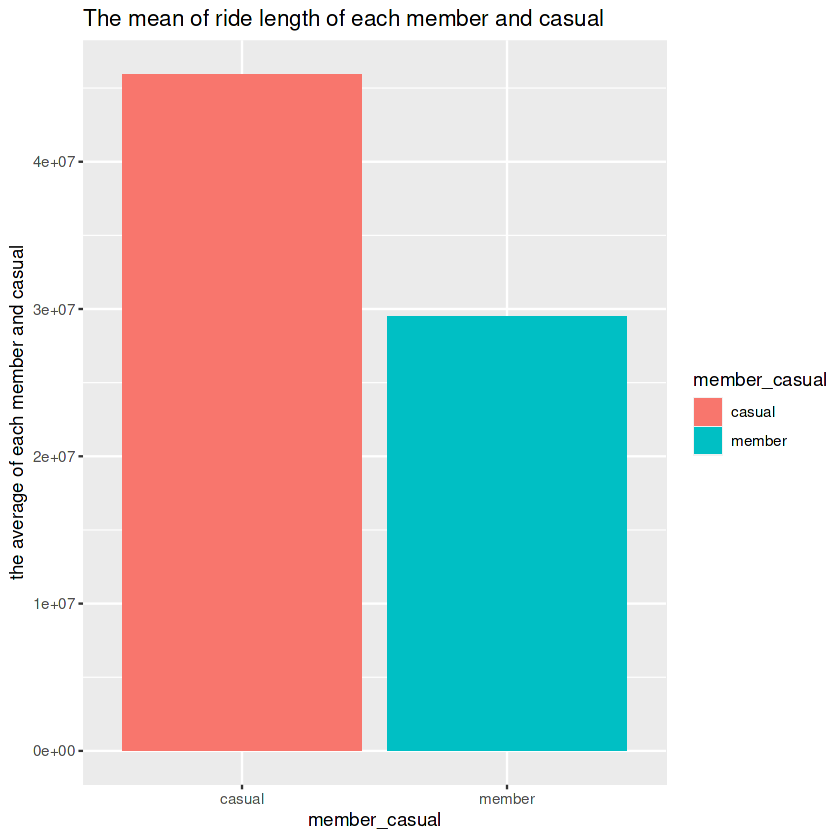

In [57]:
sample_df_v2 %>% 
  group_by(member_casual) %>% 
  summarise(total_ride_length= sum(ride_length)) %>% 
  arrange(member_casual) %>% 
  ggplot(aes(x = member_casual, y = total_ride_length, fill = member_casual)) +
  geom_col(position = "dodge") + labs(title="The mean of ride length of each member and casual")+ xlab("member_casual")+ ylab("the average of each member and casual")

-**FINDING (5)**
-> the sum of ride length in chart(3) above, of the casual, is more than the member, and with less casual users who use bikes effect the mean.

-Now  let's see the number of ride length in member and casual at hours


In [23]:
sample_df_v2 %>% 
  mutate(hour= hour(started_at)) %>% 
  group_by(member_casual, hour) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length), sum_rides = sum(ride_length)) %>% 
  arrange(hour)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,hour,number_of_rides,average_duration,sum_rides
<chr>,<int>,<int>,<dbl>,<dbl>
casual,0,536,1352.9851,725200
member,0,414,682.1908,282427
casual,1,340,1673.5794,569017
member,1,257,1000.4591,257118
casual,2,213,4979.2582,1060582
member,2,152,635.3224,96569
casual,3,119,1863.7647,221788
member,3,101,670.3366,67704
casual,4,91,1133.0769,103110


**chart(4)**
-the number of member and casual at hours.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


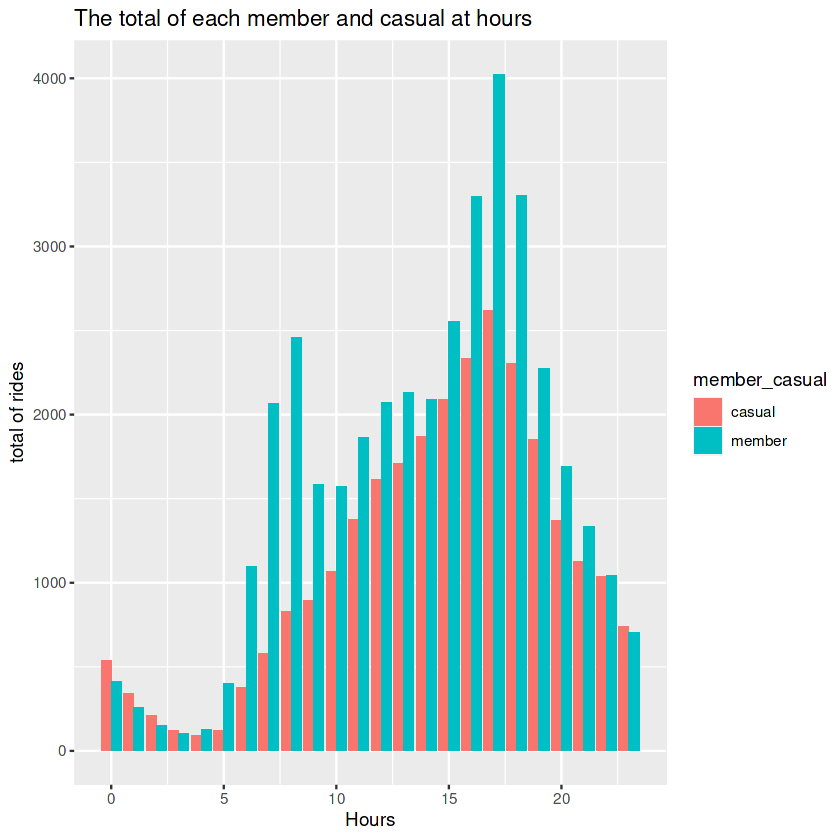

In [54]:
sample_df_v2 %>% 
  mutate(hours= hour(started_at)) %>% 
  group_by(member_casual, hours) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(hours) %>% 
  ggplot(aes(x=hours, y=number_of_rides, fill=member_casual))+
  geom_col(position = "dodge")+labs(title="The total of each member and casual at hours")+xlab("Hours")+ ylab("total of rides")

**Figure(5)**

-the ride length mean of each member and casual at an hourly scale.


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


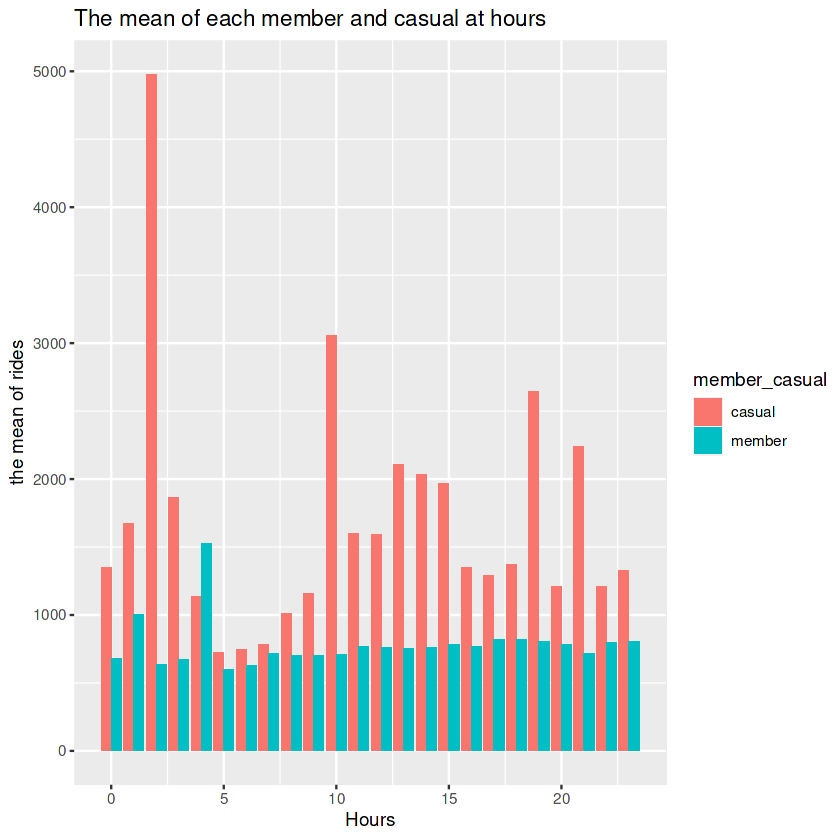

In [60]:
sample_df_v2 %>% 
  mutate(hours= hour(started_at)) %>% 
  group_by(member_casual, hours) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(hours) %>% 
  ggplot(aes(x=hours, y=average_duration, fill=member_casual))+
  geom_col(position = "dodge")+labs(title="The mean of each member and casual at hours")+ xlab("Hours")+ ylab("the mean of rides")


-**FINDING (5)**

- > the number of members is more than casual on an hourly scale.
- > as you can see in chart(4) above, there are two peaks one at 8 am (2266) and two at 5 pm (3957) for the member, which indicate their high demand at times from casual.
- > both the member and casual are greater at 5 pm (member=3957, casual=2602)
- > the mean of casual is always greater than the mean of member 
- > at 3 am there are some casuals use their bike for a long rides, because the of the ride is equal to 1769783 and the number or length of the ride is equal to 156	

-The number of member and casual in day of week.

In [27]:
sample_df_v2 %>% 
  mutate(weekday=wday(started_at, label=TRUE)) %>% 
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(weekday) 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,4550,1944.7462
member,Sun,4517,852.5639
casual,Mon,2997,1768.7761
member,Mon,5193,702.0872
casual,Tue,3103,2204.2027
member,Tue,5962,741.3994
casual,Wed,3399,1729.5116
member,Wed,6319,716.7710
casual,Thu,3738,1281.9933


**Figure(6)**
-the number of the member and casual at weekend scale 

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


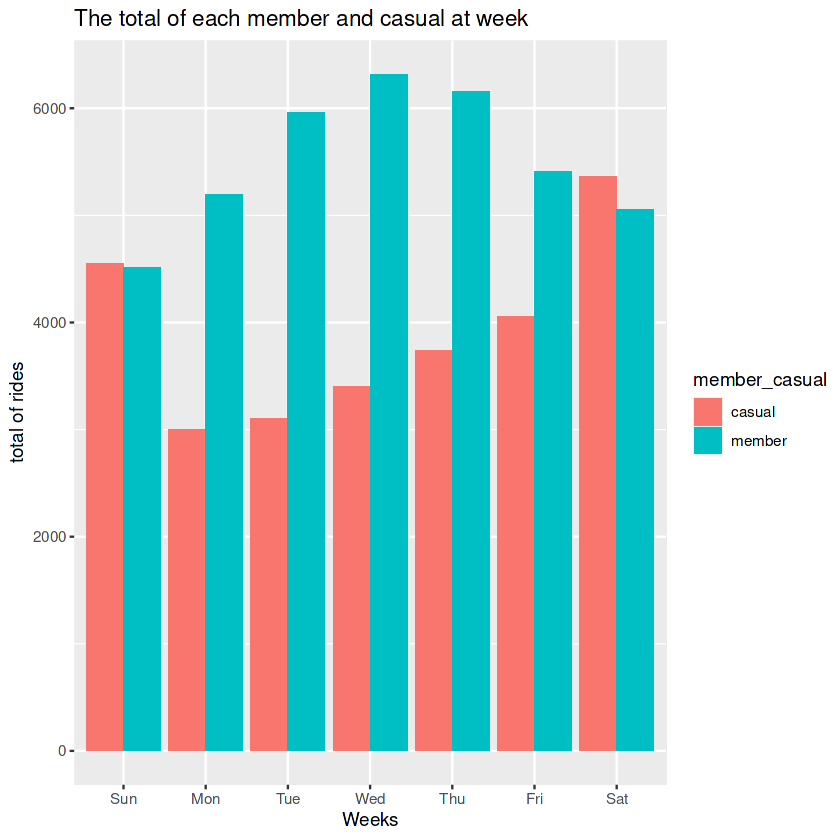

In [53]:
sample_df_v2 %>% 
  mutate(weekday=wday(started_at, label=TRUE)) %>% 
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(weekday) %>% 
  ggplot(aes(x=weekday, y=number_of_rides, fill=member_casual))+
  geom_col(position = "dodge")+labs(title="The total of each member and casual at week")+xlab("Weeks")+ ylab("total of rides")

**Figure(7)**

-The mean of each member and casual at weekday scale

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


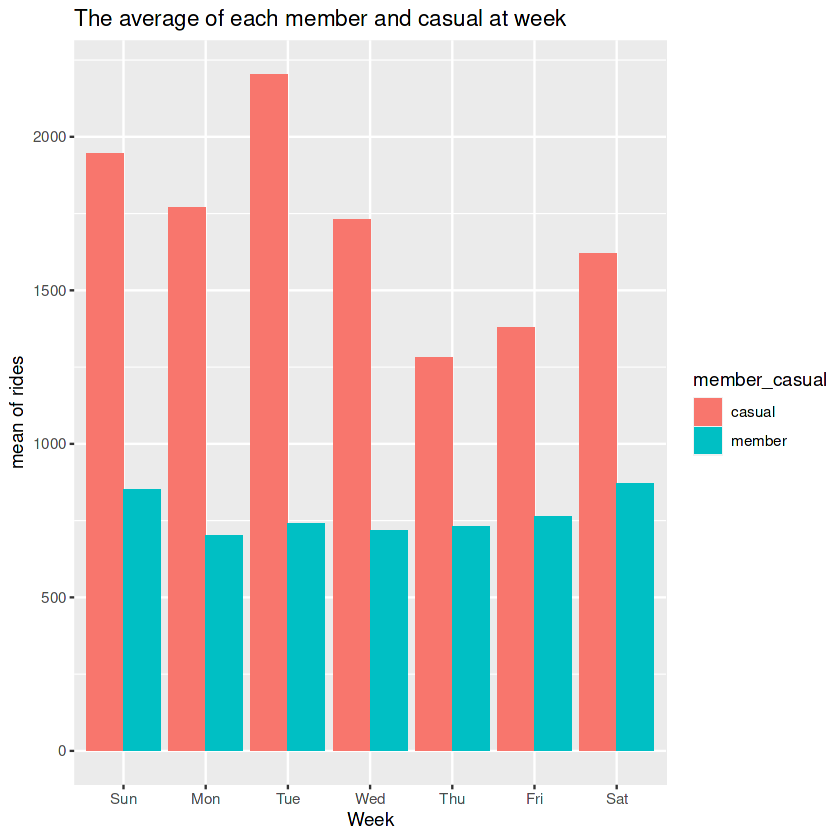

In [50]:
sample_df_v2 %>% 
  mutate(weekday=wday(started_at, label=TRUE)) %>% 
  group_by(member_casual, weekday) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>%
  arrange(weekday) %>% 
  ggplot(aes(x=weekday, y=average_duration, fill=member_casual))+
  geom_col(position = "dodge")+labs(title="The average of each member and casual at week")+ xlab("Week")+ylab("mean of rides")

-**FINDING (6)**

- > So in the table above the sum of member are more than the sum of casual from Monday to Friday, but that is different on the weekend that indicates the casual use bikes more at weekend (we need some more data like surveys to see reasons why casual user prefer using bikes at weekend) because also the mean of casual at weekend is greater than another day

-Now let's see the numbers and  the mean between the member and casual by days 

In [30]:
sample_df_v2 %>% 
  mutate(day = mday(started_at)) %>% 
  group_by(member_casual, day) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(day)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,day,number_of_rides,average_duration
<chr>,<int>,<int>,<dbl>
casual,1,869,1284.1312
member,1,1354,735.6839
casual,2,956,1353.7584
member,2,1318,724.6768
casual,3,1092,1348.2802
member,3,1315,803.8190
casual,4,882,1310.9796
member,4,1150,818.0583
casual,5,1062,1419.3399


**Figure(8)**

-the number of members and casual by day.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


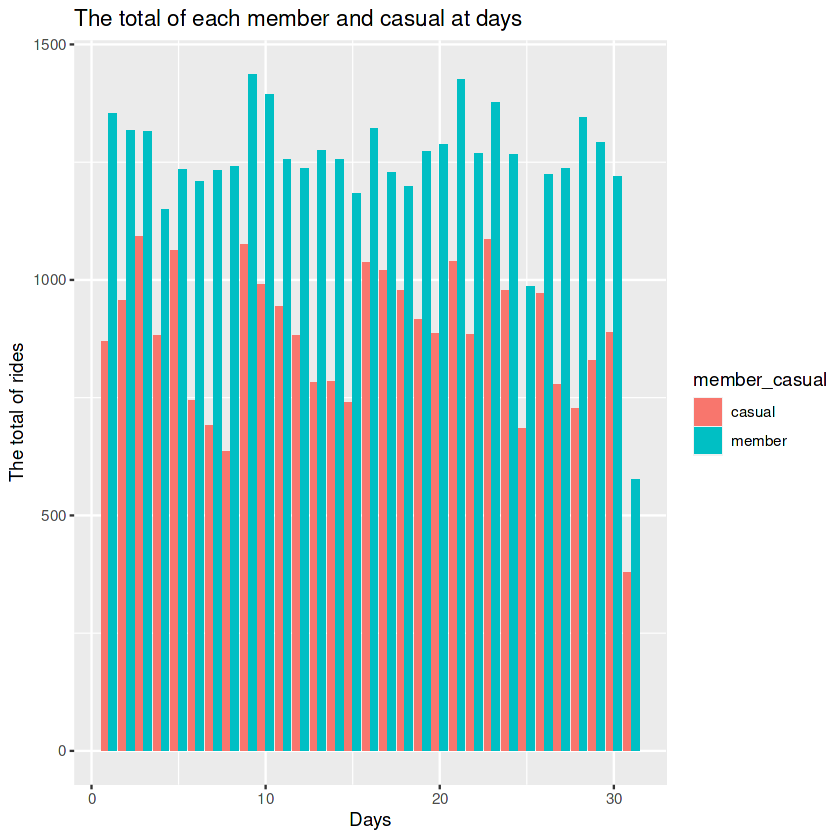

In [61]:
sample_df_v2 %>% 
  mutate(day = mday(started_at)) %>% 
  group_by(member_casual, day) %>% 
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(day)  %>% 
  ggplot(aes(x = day, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")+labs(title="The total of each member and casual at days")+ xlab("Days")+ylab("The total of rides")

**Figure(9)**

-the mean of the member and casual by day

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


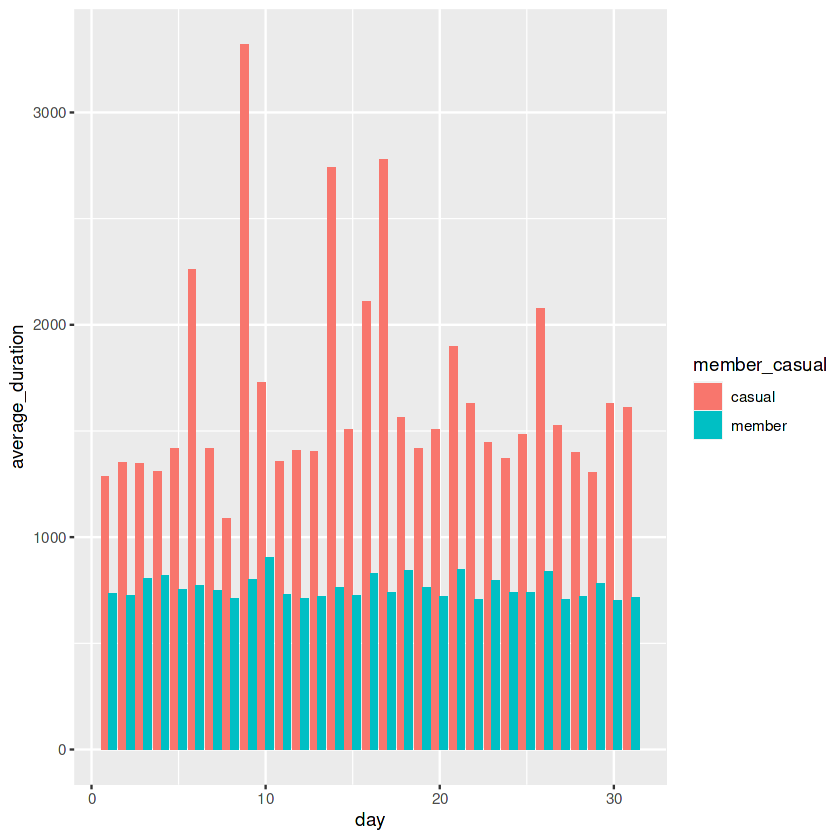

In [35]:
#Bar chart
sample_df_v2 %>% 
  mutate(day = mday(started_at)) %>% 
  group_by(member_casual, day) %>% 
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(member_casual, day)  %>% 
  ggplot(aes(x = day, y = average_duration , fill = member_casual)) +
  geom_col(position = "dodge")+labs(title="The average of each member and casual at days")+ xlab("Days")+ylab("mean of rides")


-**FINDING (7)**
- > as usual the length of member are greater than casual 
- > in the number of casuals roughly for every 7 or 8 days there are peaks
- > again the mean of the member didn't reach 1000, the mean of casual is more than 2000 on some days
- > the member and casual follow the same pattern (figure(9))


-let's see how the member and casual be different in a monthly scale.

In [36]:
sample_df_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(month)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,month,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Jan,463,1170.4190
member,Jan,1680,652.1619
casual,Feb,243,924.8395
member,Feb,1041,962.0346
casual,Mar,1010,2082.8604
member,Mar,2057,669.1740
casual,Apr,1426,1474.8170
member,Apr,2790,638.4746
casual,Jun,8329,1668.4295


**Figure(10)**
- the number of member and causal at monthly scale.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


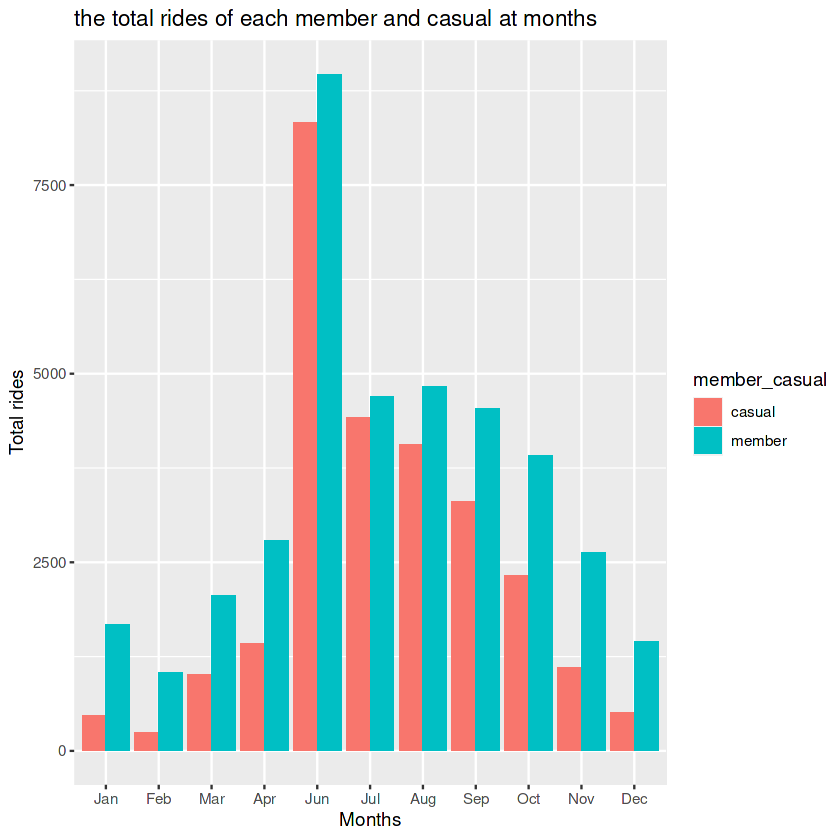

In [63]:
sample_df_v2 %>% 
  mutate(months = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, months) %>%
  summarise(number_of_rides = n()) %>% 
  arrange(months) %>% 
  ggplot(aes(x = months,  y = number_of_rides , fill = member_casual)) +
  geom_col(position = "dodge")+labs(title="the total rides of each member and casual at months")+ xlab("Months")+ylab("Total rides")

**Figure(11)** 

-the average member and casual at monthly scale.

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


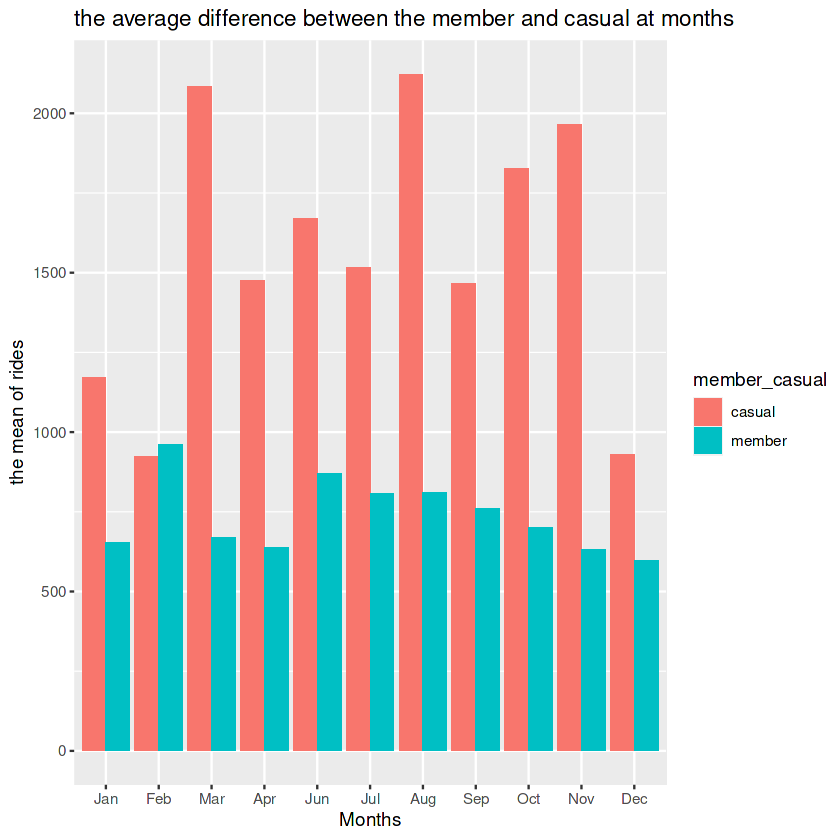

In [64]:
sample_df_v2 %>% 
  mutate(month = month(started_at, label = TRUE)) %>% 
  group_by(member_casual, month) %>%
  summarise(average_duration = mean(ride_length)) %>% 
  arrange(month) %>% 
  ggplot(aes(x = month,  y =average_duration, fill = member_casual)) +
  geom_col(position = "dodge")+labs(title="the average difference between the member and casual at months")+xlab("Months")+ylab("the mean of rides")

-**FINDING (8)**

- > First thing is the demand for bikes keep rising from May to August and then declining to December 
- > as you can see there is a huge difference between the member and casual from January to April and from October to  December, but the difference keeps shrinking from May to September, especially in summer (June, July, August ) 
- > in a chart(11) as you can see there is a big difference in the mean ride length of each member and casual 
- > this difference becomes huge in December this is because as you can see in the table above, the number of ride lengths is small, there is a small number in January too but the sum of ride lengths is also small, as the opposite of December the number of ride length is small but the sum of ride length is big, because of that the mean of December is the greater one 

-let's see in year scale

In [65]:
sample_df_v2 %>% 
  mutate(year= year(started_at)) %>% 
  group_by(member_casual, year) %>%
  summarise(number_of_rides = n()
            ,average_duration = mean(ride_length)) %>% 
  arrange(year)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


member_casual,year,number_of_rides,average_duration
<chr>,<dbl>,<int>,<dbl>
casual,2022,26744,1697.8036
member,2022,36933,768.6806
casual,2023,463,1170.4190
member,2023,1680,652.1619


**RECOMMENDATIONS**
-Based on the findings 
- > first thing of my recommendations is we need to do more surveys on times that the casual is more or equal to member because it is important to know why some casual users didn't prefer to be casual 
- > we need to do some marketing campings at times that there huge demand by casual 
- > offer some discount for the membership especially for long rides and during summer and increasing the cost of casual for the long ride
